<a href="https://colab.research.google.com/github/LimaHossain/Practice-learning-PyTorch/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
What_were_covering = {1: "data(prepare and load)",
                      2: "build model",
                      3: "Fit the model",
                      4: "making predictions and evaluate the model",
                      5: "saving and loading a model",
                      6: "putting it all together"}
What_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'Fit the model',
 4: 'making predictions and evaluate the model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

### Data preparation and loading

In [8]:
weight =  0.8
bias = 0.2

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:20], y[:20], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440],
         [0.3600],
         [0.3760],
         [0.3920],
         [0.4080],
         [0.4240],
         [0.4400],
         [0.4560],
         [0.4720],
         [0.4880],
         [0.5040]]),
 50,
 50)

In [9]:
len(X), len(y)

(50, 50)

## Splitting data into training and testing

In [10]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [11]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440],
         [0.3600],
         [0.3760],
         [

In [29]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c = 'b', s=4, label="Training data")
  plt.scatter(test_data, test_labels, c = 'g', s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', s=4, labels="predictions")

  plt.legend(prop={"size": 14});


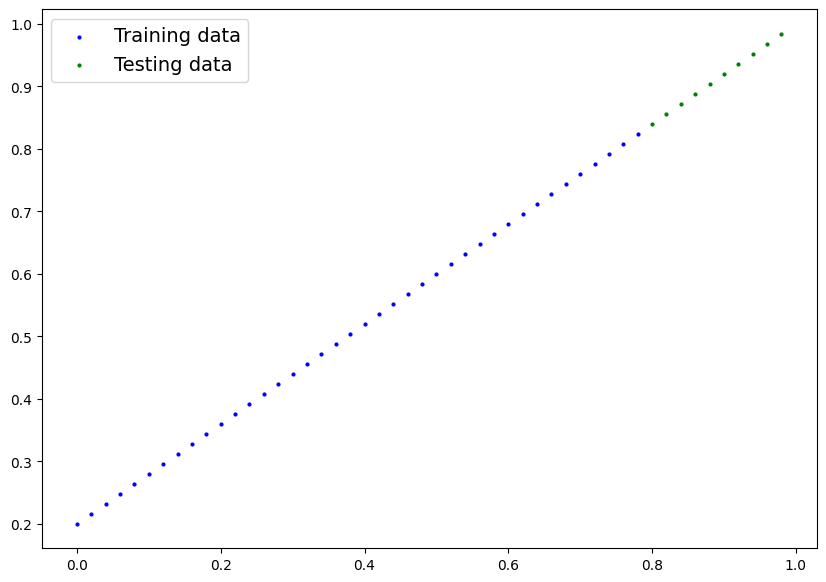

In [30]:
plot_predictions()

## Build a model

In [31]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [32]:
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
  model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
weight, bias

(0.8, 0.2)

## Making prediction using torch.inference_mode()

In [36]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [37]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [38]:
y_test

tensor([[0.8400],
        [0.8560],
        [0.8720],
        [0.8880],
        [0.9040],
        [0.9200],
        [0.9360],
        [0.9520],
        [0.9680],
        [0.9840]])

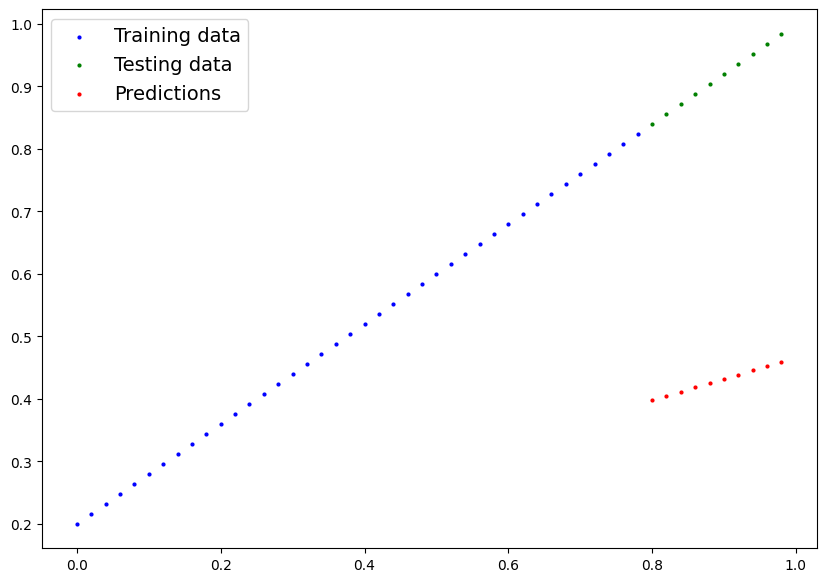

In [39]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions(predictions=y_preds)

In [40]:
y_test - y_preds

tensor([[0.4418],
        [0.4511],
        [0.4604],
        [0.4696],
        [0.4789],
        [0.4882],
        [0.4974],
        [0.5067],
        [0.5160],
        [0.5252]])

In [41]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Loss Function
learning rate or lr = 0.01; is a hyperparameters that defines how big/small the optimizer changes the parameters

In [43]:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01)

In [45]:
torch.manual_seed(42)

epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    print(f"loss: {loss}")

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode(): #turns off gradient tracking & couple more things behind the scences
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss} ")
        print(model_0.state_dict())

loss: 0.011416126973927021
Epoch: 0 | Train Loss: 0.011416126973927021 | Test Loss: 0.025647372007369995 
OrderedDict([('weights', tensor([0.7450])), ('bias', tensor([0.2233]))])
loss: 0.011077459901571274
loss: 0.010730923153460026
loss: 0.010388460010290146
loss: 0.01004572119563818
loss: 0.009699437767267227
loss: 0.009360517375171185
loss: 0.009011512622237206
loss: 0.008674231357872486
loss: 0.008326317183673382
loss: 0.00798521377146244
Epoch: 10 | Train Loss: 0.00798521377146244 | Test Loss: 0.018061798065900803 
OrderedDict([('weights', tensor([0.7619])), ('bias', tensor([0.2158]))])
loss: 0.007641120348125696
loss: 0.007296205498278141
loss: 0.006955908145755529
loss: 0.006607189774513245
loss: 0.006270702928304672
loss: 0.005921709351241589
loss: 0.005581982433795929
loss: 0.005236509256064892
loss: 0.004892969503998756
loss: 0.004551304038614035
Epoch: 20 | Train Loss: 0.004551304038614035 | Test Loss: 0.009789329953491688 
OrderedDict([('weights', tensor([0.7791])), ('bias'

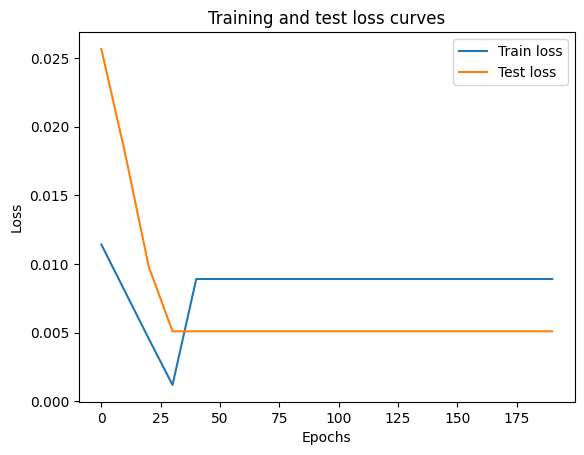

In [46]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [47]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [48]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [49]:
weight, bias

(0.8, 0.2)

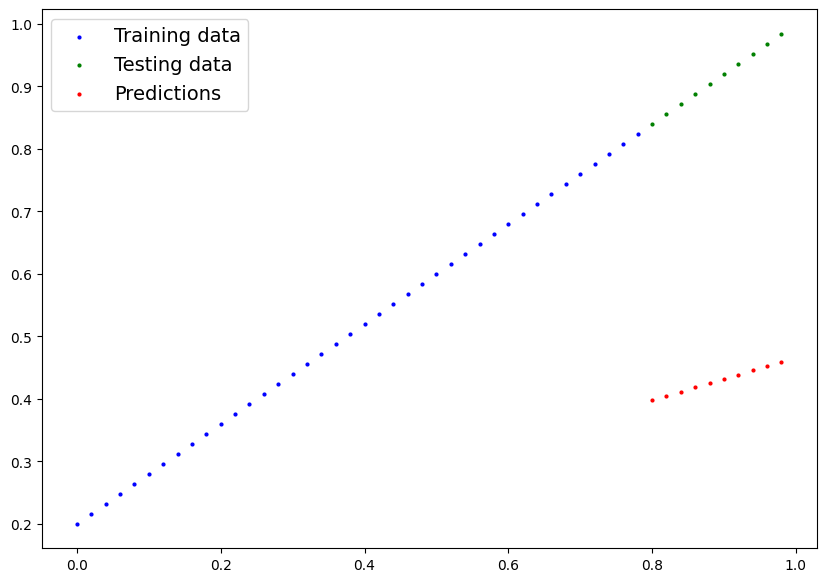

In [50]:
plot_predictions(predictions =  y_preds);

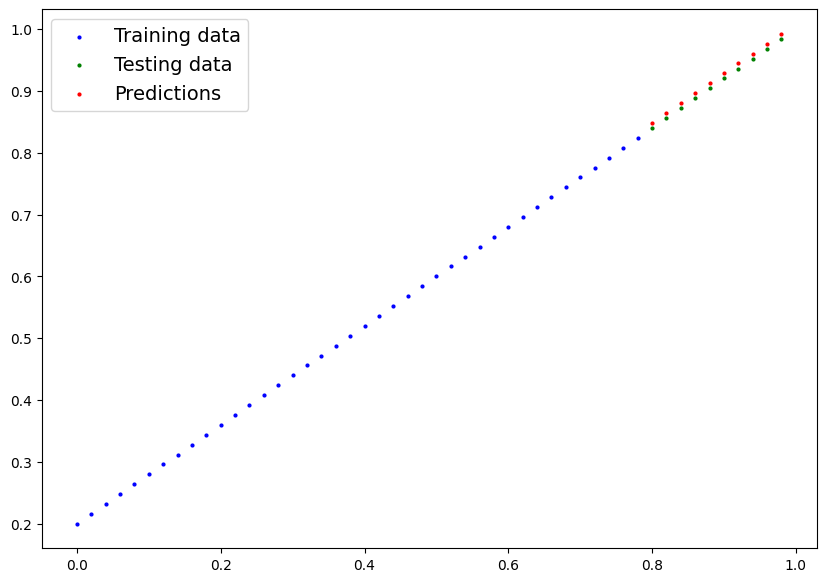

In [51]:
plot_predictions(predictions =  y_preds_new);

###Saving a Model in Pytorch

In [52]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [53]:
from pathlib import Path

#create models directory
Model_Path = Path("Models")
Model_Path.mkdir(parents = True, exist_ok = True)
#create model save path
Model_Name = "PyTorch_Workflow_model_0.pth"
Model_Save_Path = Model_Path / Model_Name
#save the model state dict
print(f"Saving model to: {Model_Save_Path}")
torch.save(obj = model_0.state_dict(),
           f=Model_Save_Path)

Saving model to: Models/PyTorch_Workflow_model_0.pth


In [54]:
!ls -l Models

total 4
-rw-r--r-- 1 root root 1662 Mar 14 21:54 PyTorch_Workflow_model_0.pth


##Loading a Pytorch Model

In [55]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [56]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = Model_Save_Path))

<All keys matched successfully>

In [57]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7990])), ('bias', tensor([0.2093]))])

In [58]:
#Make Some Predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8485],
        [0.8645],
        [0.8804],
        [0.8964],
        [0.9124],
        [0.9284],
        [0.9443],
        [0.9603],
        [0.9763],
        [0.9923]])

In [59]:
# compare loaded model preds with original model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  y_preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##Putting it all together

In [60]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

In [62]:
device ="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


In [63]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y= weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [64]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

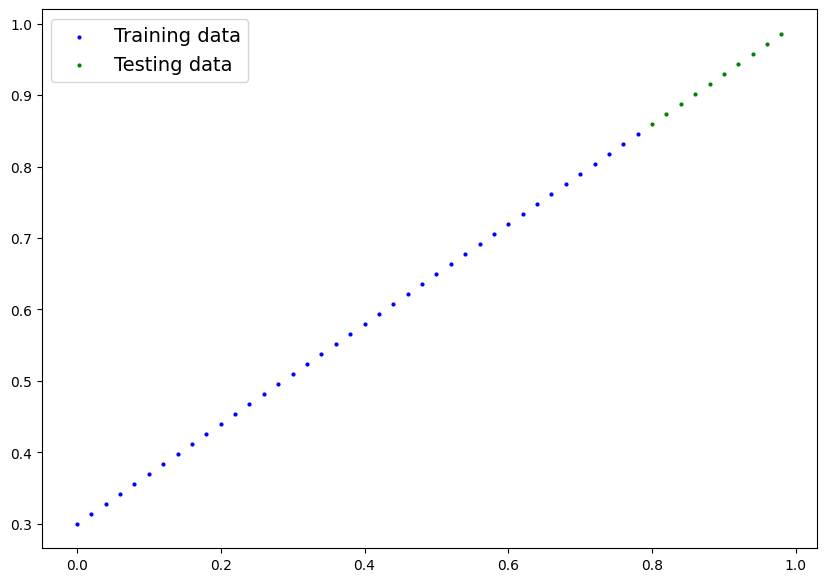

In [65]:
plot_predictions(X_train, y_train, X_test, y_test)

In [66]:
class LinearRegressionModelV2(nn.Module):
  def __init__ (self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features= 1)
  def forward(self, x: torch.Tensor):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [67]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [68]:
next(model_1.parameters()).device

device(type='cpu')

In [69]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [70]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

torch.manual_seed(42)
epochs = 200
for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"epoch:{epoch} | loss: {loss} | Test loss: {test_loss}")

epoch:0 | loss: 0.5551779866218567 | Test loss: 0.5739762187004089
epoch:10 | loss: 0.4399680495262146 | Test loss: 0.4392663538455963
epoch:20 | loss: 0.3247582018375397 | Test loss: 0.30455657839775085
epoch:30 | loss: 0.20954827964305878 | Test loss: 0.16984674334526062
epoch:40 | loss: 0.09433844685554504 | Test loss: 0.03513689711689949
epoch:50 | loss: 0.023886386305093765 | Test loss: 0.04784906655550003
epoch:60 | loss: 0.0199567973613739 | Test loss: 0.04580312222242355
epoch:70 | loss: 0.016517987474799156 | Test loss: 0.0375305712223053
epoch:80 | loss: 0.013089170679450035 | Test loss: 0.029944902285933495
epoch:90 | loss: 0.009653178043663502 | Test loss: 0.02167237363755703
epoch:100 | loss: 0.006215679459273815 | Test loss: 0.014086711220443249
epoch:110 | loss: 0.002787243574857712 | Test loss: 0.005814164876937866
epoch:120 | loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
epoch:130 | loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
epoch:140

In [71]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [72]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

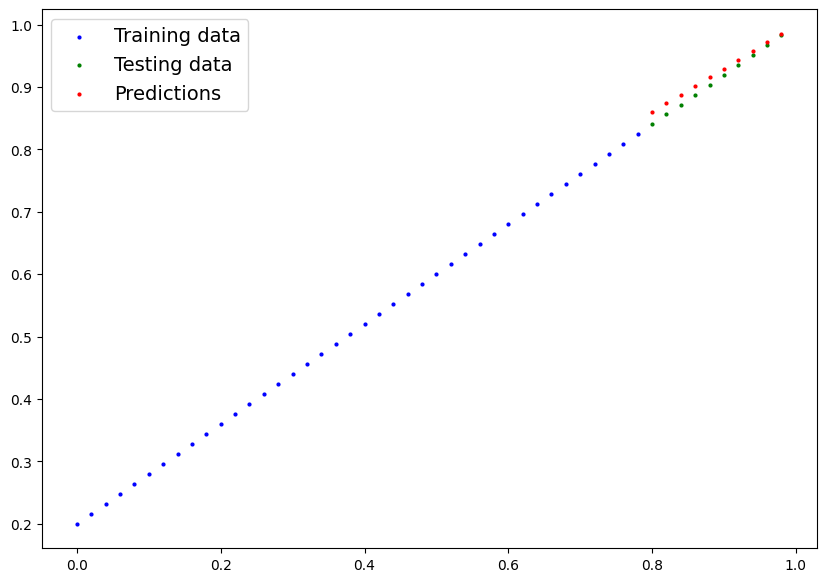

In [73]:
plot_predictions(predictions=y_preds)

In [74]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

model_name = "Model 1.pth"
Model_Save_Path = model_path / model_name

print(f"Saving model to: {Model_Save_Path}")
torch.save(obj=model_1.state_dict(), f=Model_Save_Path)

Saving model to: models/Model 1.pth


In [75]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(Model_Save_Path))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [77]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])